# PROJECT-4. Задача классификации

### Варламов Александр (поток DSPR-131)

# 1. Problem(Проблема)

### Проблема:

Банки хранят огромные объёмы информации о своих клиентах. Эти данные можно использовать для того, чтобы оставаться на связи с клиентами и индивидуально ориентировать их на подходящие именно им продукты или банковские предложения.

Обычно с выбранными клиентами связываются напрямую через разные каналы связи: лично (например, при визите в банк), по телефону, по электронной почте, в мессенджерах и так далее. Этот вид маркетинга называется прямым маркетингом. На самом деле, прямой маркетинг используется для взаимодействия с клиентами в большинстве банков и страховых компаний. Но, разумеется, проведение маркетинговых кампаний и взаимодействие с клиентами — это ***трудозатратно и дорого***.

Банк предоставил данные о последней маркетинговой кампании, которую проводил чтобы привлечь клиентов для открытия депозита.

### Цель проекта:

***Бизнес-цель***: определить характеристики, по которым можно выявить клиентов, более склонных к открытию депозита в банке, и за счёт этого повысить результативность маркетинговой кампании.

***Техническая цель***: построить модель машинного обучения, которая на основе предложенных характеристик клиента будет предсказывать, воспользуется он предложением об открытии депозита или нет.

### Задачи проекта:

1. **Провести первичную обработку данных** - необходимо обработать пропуски и выбросы в данных для дальнейшей работы с ними;
2. **Провести разведывательный анализ данных (EDA)** - необходимо исследовать данные, определить первые закономерности и выдвинуть гипотезы;
3. **Выполнить отбор и преобразование признаков** - необходимо перекодировать и преобразовать признаки для решения задачи класификации;
4. **Построить модель класификации с использованием алгоритмов - логистическая регрессия и решающие деревья** - необходимо построить первую прогностическую модель и оценить ее качество, подобрать оптимальные параметры модели для получения наилучших результатов;
5. **Построить модель класификации с помощью алгоритма - ансамбли моделей** - необходимо построить прогностическую модель с использованием более сложного алгоритма, оценить качество, подобрать оптимальные параметры;
6. **Построение прогноза** - определить алгоритм для построения модели с более качественными предсказаниями, доработать предсказания и прогнозы.

# 2. Collection(Сбор данных)

### Импорт необходимых библиотек и функций

In [673]:
# базовые DS библиотеки
import numpy as np
import pandas as pd

# библиотеки визуализации
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

from sklearn import preprocessing 
from sklearn.preprocessing  import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import IsolationForest 
from sklearn.ensemble import StackingClassifier

from sklearn import metrics 

from sklearn.model_selection import train_test_split # разделение выборки на train и test
from sklearn.model_selection import GridSearchCV # оптимизация гиперпараметров 
 
from sklearn.feature_selection import SelectKBest, f_classif

from category_encoders import OneHotEncoder #кодирование признаков

import optuna

# cтандартные python библиотеки
import os
import time
import warnings
warnings.filterwarnings('ignore')

In [507]:
# фиксируем RANDOM_SEED, для воспроизводимости кода.
RANDOM_SEED = 42

In [230]:
# фиксируем версии установленных пакетов
#!pip freeze > requrements.txt

### Загружаем данные

In [508]:
# загружаем данные в dataframe
df = pd.read_csv('data/bank_fin.csv', sep=';')

### Первичный анализ

In [509]:
# выводим информацию о табличной структуре данных (голова - хвост)
display(df.head(3))
display(df.tail(1))

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,"2 343,00 $",yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,"45,00 $",no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,"1 270,00 $",yes,no,unknown,5,may,1389,1,-1,0,unknown,yes


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11161,34,technician,married,secondary,no,0 $,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [510]:
# выводим информацию о данных с использованием функции info
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11137 non-null  object
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(6), object(11)
memory usage: 1.4+ MB


None

In [511]:
# выводим статистическую информацию о признаках с помощью функции describe()
display(df.describe())

,age,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [512]:
# выводим статистическую информацию о признаках типа object с помощью функции describe()
display(df.describe(include='object'))

,job,marital,education,default,balance,housing,loan,contact,month,poutcome,deposit
count,11162,11162,11162,11162,11137,11162,11162,11162,11162,11162,11162
unique,12,3,4,2,3802,2,2,3,12,4,2
top,management,married,secondary,no,0 $,no,no,cellular,may,unknown,no
freq,2566,6351,5476,10994,774,5881,9702,8042,2824,8326,5873


### Краткие выводы и комментарии

1. Dataset содержит 11162 наблюдения и имеет 17 признаков;
2. Данные представлены следующими типами: int64 - 6 признаков; object - 11 признаков;
3. Пропуски данных имеются только в одном признаке - 'balance';
4. Признак 'balance' имеет тип данных 'object', хотя содержит числовые данные в строковом виде;
5. Часть признаков - 'contact', 'poutcome' имеют значения 'unknown', что может говорить о кодировке пропусков словом / значением (необходимо проверить все признаки типа 'object'); 
6. Признаки можно разделить на несколько категорий и расшифровать:

    **Данные о клиентах банка:**

       * age (возраст);
       * job (сфера занятости);
       * marital (семейное положение);
       * education (уровень образования);
       * default (имеется ли просроченный кредит);
       * housing (имеется ли кредит на жильё);
       * loan (имеется ли кредит на личные нужды);
       * balance (баланс).

    **Данные, связанные с последним контактом в контексте текущей маркетинговой кампании:**

       * contact (тип контакта с клиентом);
       * month (месяц, в котором был последний контакт);
       * day (день, в который был последний контакт);
       * duration (продолжительность контакта в секундах).

    **Прочие признаки:**

       * campaign (количество контактов с этим клиентом в течение текущей кампании);
       * pdays (количество пропущенных дней с момента последней маркетинговой кампании до контакта в текущей кампании);
       * previous (количество контактов до текущей кампании)
       * poutcome (результат прошлой маркетинговой кампании).

    **Целевая переменная**:

       * deposit (которая определяет, согласится ли клиент открыть депозит в банке. Именно её мы будем пытаться предсказать в данном кейсе).

# 3. Cleaning(Очистка данных).

На данном этапе определяются пропуски, аномалии и выбросы в данных.

## 3.1 Обработка пропусков.

In [513]:
# формируем и выводим информацию о наличие пропусков в признаках
cols_null = df.isnull().sum() # все признаки с пропусками по колличеству
cols_null_percent = df.isnull().mean() * 100 # все признаки с пропусками в %
cols_with_null_percent = cols_null_percent[cols_null_percent > 0].sort_values(ascending=False) # признаки с наличием пропусков (%)
display(cols_null)
#display(cols_null_percent)
#display(cols_with_null_percent)

age           0
job           0
marital       0
education     0
default       0
balance      25
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
deposit       0
dtype: int64

**Краткие комментарии / выводы:**

1. Пропуски присутсвуют в 1 признаке - 'balance' и составляют 25 ячеек.

Так как при первичном рассмотрении данных мы выявили, что признаки имеют значения 'unknown', проведем анализ какие признаки имеют данное значение и в каком количестве:

In [514]:
# формируем код и выводим информацию о наличие значения unknown в признаках и его количеству
object_features = df.select_dtypes(include='object').columns.tolist()

for feature in object_features:
    if 'unknown' in df[feature].unique():
        unknown_number = df[feature].value_counts().loc['unknown']
        print(f"Признак '{feature}' содержит категорию 'unknown' и количество значений - {unknown_number}.")

Признак 'job' содержит категорию 'unknown' и количество значений - 70.
Признак 'education' содержит категорию 'unknown' и количество значений - 497.
Признак 'contact' содержит категорию 'unknown' и количество значений - 2346.
Признак 'poutcome' содержит категорию 'unknown' и количество значений - 8326.


**Краткие комментарии / выводы:**

1. 4 признака имеют значение 'unknown', что может служить о скрытых пропусках. Примем во внимание и в последующем решим, что делать.

### Задание 3

При первичном анализе мы выявили, что признак 'balance' имеет тип данных 'object', хотя содержит числовые данные в строковом виде. Обработаем его в числовой признак с типом данных 'float'.

In [515]:
# описываем функцию для преобразования данных str типа в тип float
def get_balance(arg):
    arg = str(arg).replace(' ', '').replace('$', '').replace(',', '.')
    return arg
# производим преобразование данных в признаке
df['balance'] = df['balance'].apply(get_balance).astype(float)
# выводим информацию по признаку для оценки преобразования
display(df['balance'].head(1))

0    2343.0
Name: balance, dtype: float64

In [516]:
# выведем информацию о среднем значении признака balance до преобразования и после преобразования, пропуски заполним медианным значением
mean_befor = df['balance'].mean()
display(f'Среднее значение признака до заполнения пропусков составляет: {mean_befor.round(3)}.')
df['balance'] = df['balance'].fillna(df['balance'].median())
mean_after = df['balance'].mean()
display(f'Среднее значение признака после заполнения пропусков составляет: {mean_after.round(3)}.')

'Среднее значение признака до заполнения пропусков составляет: 1529.129.'

'Среднее значение признака после заполнения пропусков составляет: 1526.936.'

### Задание 5

In [517]:
# обработаем пропуски в категориальных признаках: job и education, заменив их на модальные значения
df['job'] = df['job'].apply(lambda x: df['job'].mode()[0] if x == 'unknown' else x)
df['education'] = df['education'].apply(lambda x: df['education'].mode()[0] if x == 'unknown' else x)

После замены пропусков рассчитаем средний баланс для клиентов с самой популярной работой и самым популярным уровнем образования (т. е. для тех, у кого одновременно самая популярная работа и самое популярное образование). Ответ округлите до трёх знаков после точки-разделителя.

In [518]:
# формируем и выводим информацию
mask_job = df['job'] == df['job'].value_counts().index[0]
mask_education = df['education'] == df['education'].value_counts().index[0]
balance_mean_mostpopular_job_education = df[mask_job & mask_education]['balance'].mean()
print(f'Средний баланс для клиентов с самой популярной работой и образованием составляет: {balance_mean_mostpopular_job_education.round(3)}.')

Средний баланс для клиентов с самой популярной работой и образованием составляет: 1598.883.


### Задание 6

Изучите признак, отображающий баланс клиентов, на предмет выбросов.

В математической статистике есть несколько подходов, позволяющих определить наличие выбросов. Мы будем считать, что выбросы находятся за пределами отрезка, нижняя граница которого определяется как нижний квартиль, из которого вычли полтора межквартильных размаха $(Q_1 - 1.5 * IQR)$ , а верхняя граница — как верхний квартиль, к которому прибавили полтора межквартильных размаха ($(Q_3 + 1.5 * IQR)$). Найдите эти границы, и отфильтруйте значения так, чтобы выбросов в данных не осталось.

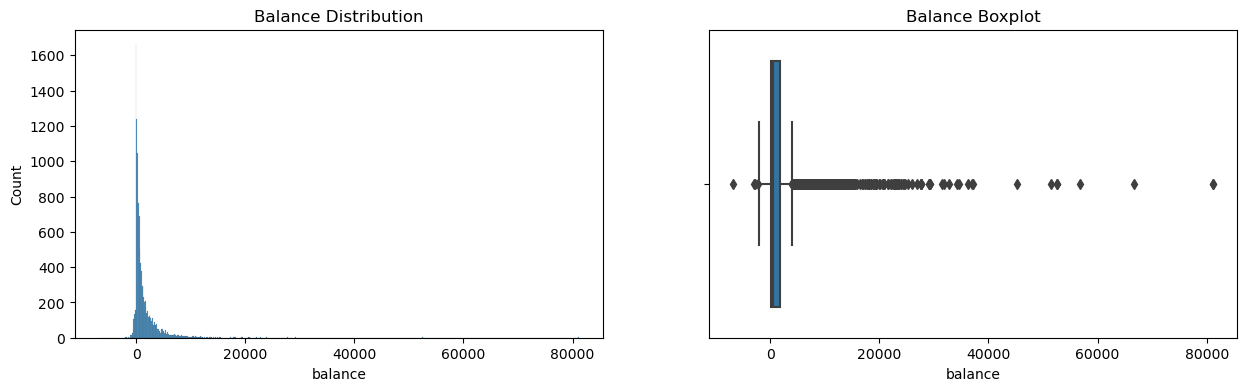

In [519]:
# строим гистограмму и коробчатую диаграмму для визуальной оценки выбросов в признаке balance
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
hisplot = sns.histplot(data=df, x='balance', ax=axes[0]);
hisplot.set_title('Balance Distribution');
boxplot = sns.boxplot(data=df, x='balance', ax=axes[1]);
boxplot.set_title('Balance Boxplot');

In [520]:
# определим нижнюю и верхнюю границы поиска выбросов по методу Тьюки при межквартальном размахе 1.5
left, right = 1.5, 1.5
quartile_1, quartile_3 = df['balance'].quantile(0.25), df['balance'].quantile(0.75)
iqr = quartile_3 - quartile_1
lower_bound = quartile_1 - (iqr * left)
upper_bound = quartile_3 + (iqr * right)
print(f'Нижняя граница поиска выбросов по методу Тьюки составляет: {lower_bound.round(0)}.')
print(f'Верхняя граница поиска выбросов по методу Тьюки составляет: {upper_bound.round(0)}.')

Нижняя граница поиска выбросов по методу Тьюки составляет: -2241.0.
Верхняя граница поиска выбросов по методу Тьюки составляет: 4063.0.


In [521]:
# описываем функцию для поиска выбросов на основании метода межквартильных размахов (метода Тьюки)
def outliers_iqr_mod_log(data, feature, left=1.5, right=1.5, log_scale=False):
    if log_scale:
        x = np.log(data[feature])
    else:    
        x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x<=lower_bound) | (x >= upper_bound)] # нестрогое неравенство, если ставить строгое то: outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>=lower_bound) & (x <= upper_bound)] # нестрогое неравенство, если ставить строгое то: cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned

In [522]:
# применяем функцию для признака balance и выводим информацию о количестве выбросов и количеству наблюдений в очищенном dataframe
outliers, cleaned = outliers_iqr_mod_log(df, 'balance', left=1.5, right=1.5)
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}.')
print(f'Результирующее число наблюдений после удаления выбросов: {cleaned.shape[0]}.')

Число выбросов по методу Тьюки: 1058.
Результирующее число наблюдений после удаления выбросов: 10105.


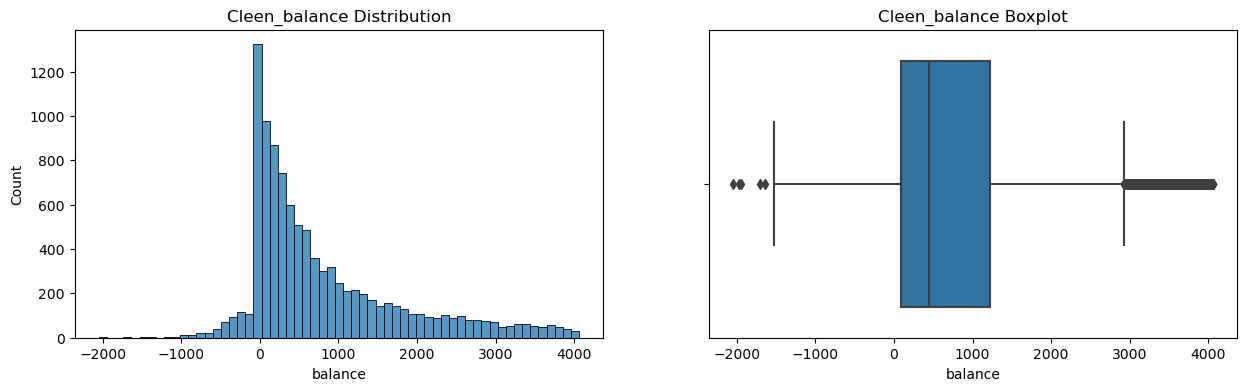

In [523]:
# строим гистограмму и коробчатую диаграмму для визуальной оценки признака balance после удаления выбросов
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
hisplot = sns.histplot(data=cleaned, x='balance', ax=axes[0]);
hisplot.set_title('Cleen_balance Distribution');
boxplot = sns.boxplot(data=cleaned, x='balance', ax=axes[1]);
boxplot.set_title('Cleen_balance Boxplot');

In [524]:
# сохраним копию очищенных данных
df_cleen = cleaned.copy()

## 4. Exploratory Data Analysis-EDA (Разведывательный анализ данных)

### Задание 1

In [525]:
# изучите соотношение классов в ваших данных на предмет несбалансированности, проиллюстрируйте результат
# ваш код
df_cleen['deposit'].value_counts()

deposit
no     5424
yes    4681
Name: count, dtype: int64

<Axes: xlabel='deposit', ylabel='count'>

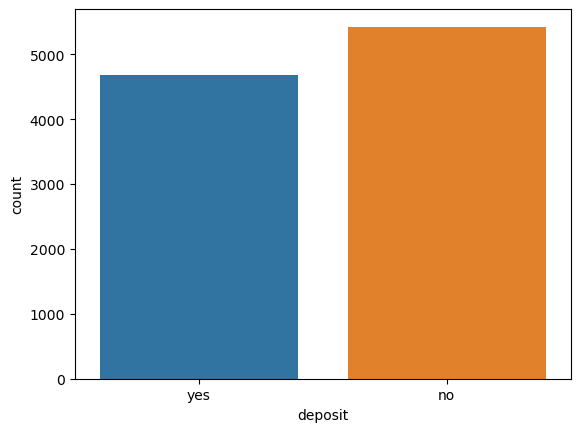

In [526]:
sns.countplot(data=df_cleen, x='deposit')

### Задания 2 и 3

In [528]:
#рассчитайте описательные статистики для количественных переменных, проинтерпретируйте результат
#ваш код
display(df_cleen.describe())

,age,balance,day,duration,campaign,pdays,previous
count,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000
mean,40.895497,807.653538,15.590302,368.742603,2.517170,51.319644,0.816230
std,11.734931,994.151966,8.441510,346.651524,2.707159,109.644179,2.243795
min,18.000000,-2049.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,95.000000,8.000000,137.000000,1.000000,-1.000000,0.000000
50%,38.000000,445.000000,15.000000,252.000000,2.000000,-1.000000,0.000000
75%,48.000000,1227.000000,22.000000,490.000000,3.000000,2.000000,1.000000
max,95.000000,4063.000000,31.000000,3881.000000,43.000000,854.000000,58.000000


### Задания 4 и 5

In [529]:
#рассчитайте описательные статистики для категориальных переменных, проинтерпретируйте результат
#ваш код
#постройте визуализации, иллюстрирующие результаты
display(df_cleen.describe(include=object))

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,10105,10105,10105,10105,10105,10105,10105,10105,10105,10105
unique,11,3,3,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2315,5715,5517,9939,5243,8712,7283,2617,7570,5424


### Задание 6

<Axes: xlabel='poutcome'>

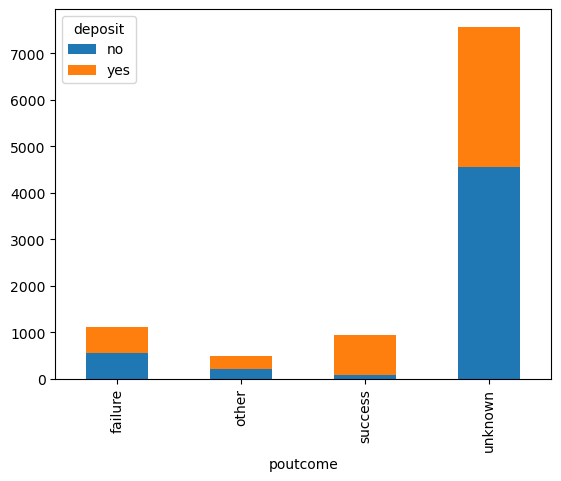

In [530]:
# Узнайте, для какого статуса предыдущей маркетинговой кампании успех в текущей превалирует над количеством неудач.
# ваш код
types = df_cleen.groupby("poutcome")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

### Задание 7

<Axes: xlabel='month'>

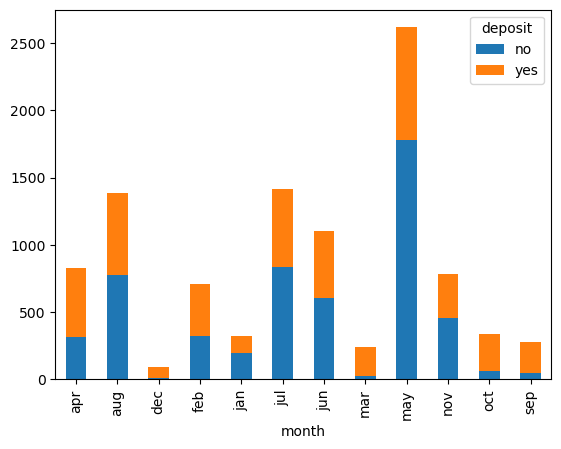

In [531]:
# узнайте, в каком месяце чаще всего отказывались от предложения открыть депозит
# ваш код
months_ = df_cleen.groupby('month')['deposit'].value_counts(normalize=False).unstack()
months_.plot(kind='bar', stacked='True')

### Задание 8

<Axes: xlabel='age_group', ylabel='count'>

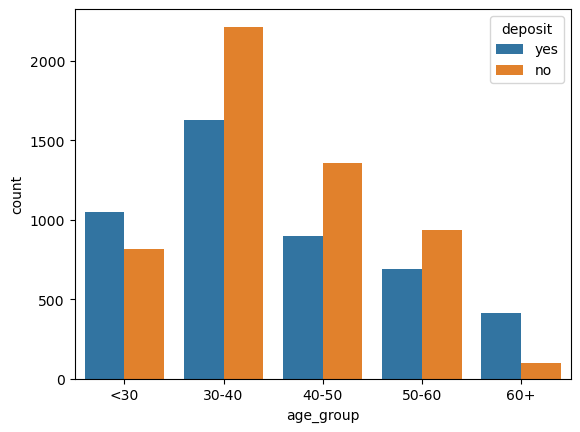

In [532]:
# создайте возрастные группы и определите, в каких группах более склонны открывать депозит, чем отказываться от предложения
df_cleen['age_group'] = pd.cut(df_cleen['age'], [0, 30, 40, 50, 60, 9999], labels = ['<30','30-40','40-50','50-60','60+'])
sns.countplot(x="age_group", hue="deposit", data=df_cleen)

### Задания 9 и 10

<Axes: xlabel='marital'>

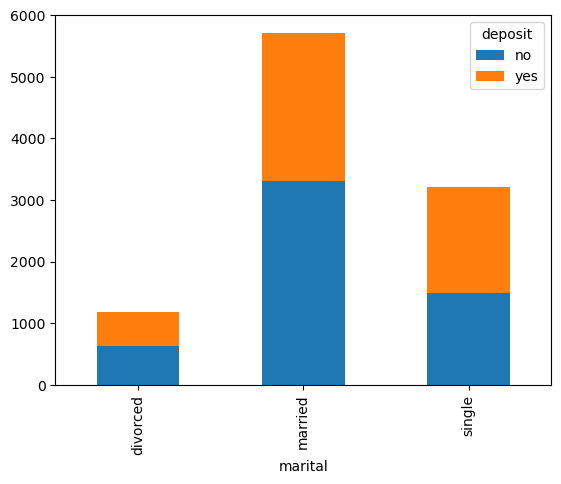

In [533]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от семейного статуса
marital_ = df_cleen.groupby('marital')['deposit'].value_counts(normalize=False).unstack()
marital_.plot(kind='bar', stacked='True')

<Axes: xlabel='education'>

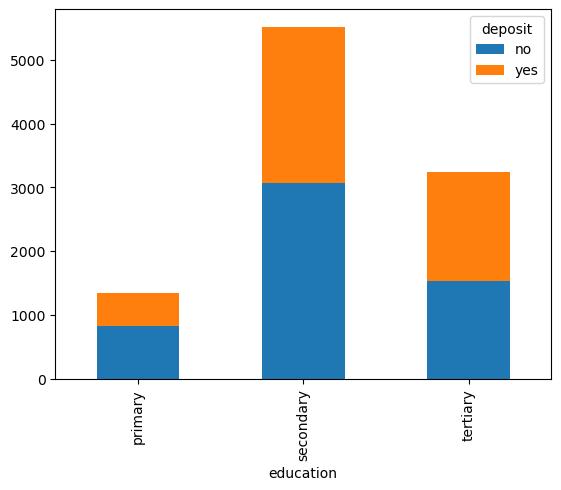

In [534]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от образования
education_ = df_cleen.groupby('education')['deposit'].value_counts(normalize=False).unstack()
education_.plot(kind='bar', stacked='True')

<Axes: xlabel='job'>

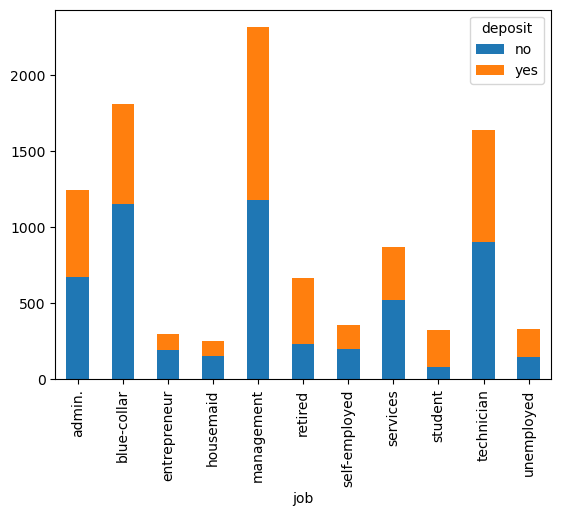

In [535]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от вида профессиональной занятости
job_ = df_cleen.groupby('job')['deposit'].value_counts(normalize=False).unstack()
job_.plot(kind='bar', stacked='True')

### Задание 11

In [536]:
# постройте сводную таблицу, чтобы определить люди с каким образованием и семейным статусом наиболее многочисленны
#(если рассматривать тех, кто открыл депозит)
mask_deposit_0 = df_cleen['deposit'] == 'no'
mask_deposit_1 = df_cleen['deposit'] == 'yes'

In [537]:
cleen_0 = pd.crosstab(index=df_cleen[mask_deposit_0]['education'], columns=df_cleen[mask_deposit_0]['marital'], margins=True)
cleen_0


marital,divorced,married,single,All
education,,,,
primary,91,641,100,832
secondary,370,1830,866,3066
tertiary,163,832,531,1526
All,624,3303,1497,5424


<Axes: xlabel='marital', ylabel='education'>

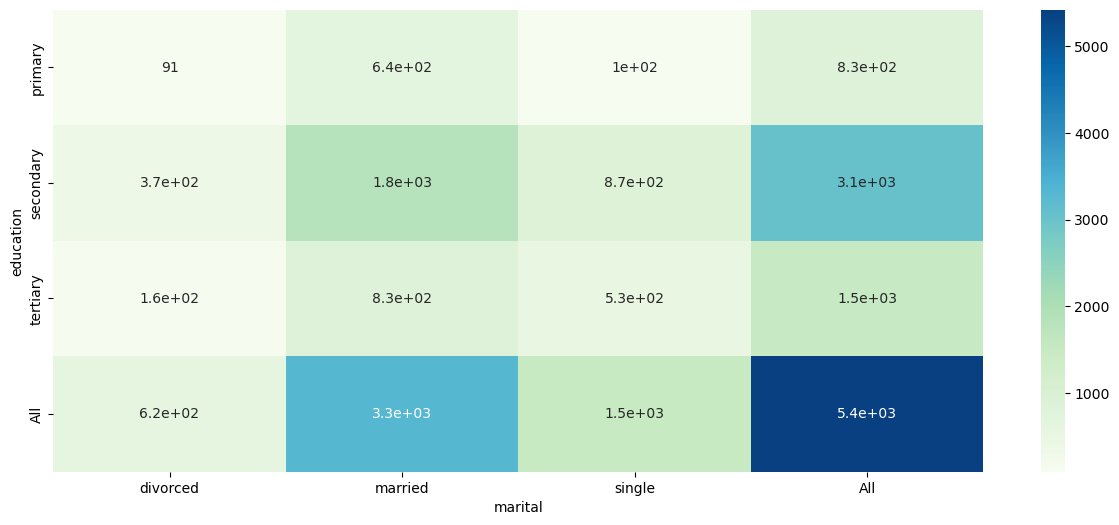

In [538]:
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(15,6))
sns.heatmap(cleen_0, annot=True, cmap='GnBu')

In [539]:
cleen_1 = pd.crosstab(index=df_cleen[mask_deposit_1]['education'], columns=df_cleen[mask_deposit_1]['marital'], margins=True)
cleen_1

marital,divorced,married,single,All
education,,,,
primary,96,339,82,517
secondary,283,1289,879,2451
tertiary,174,784,755,1713
All,553,2412,1716,4681


<Axes: xlabel='marital', ylabel='education'>

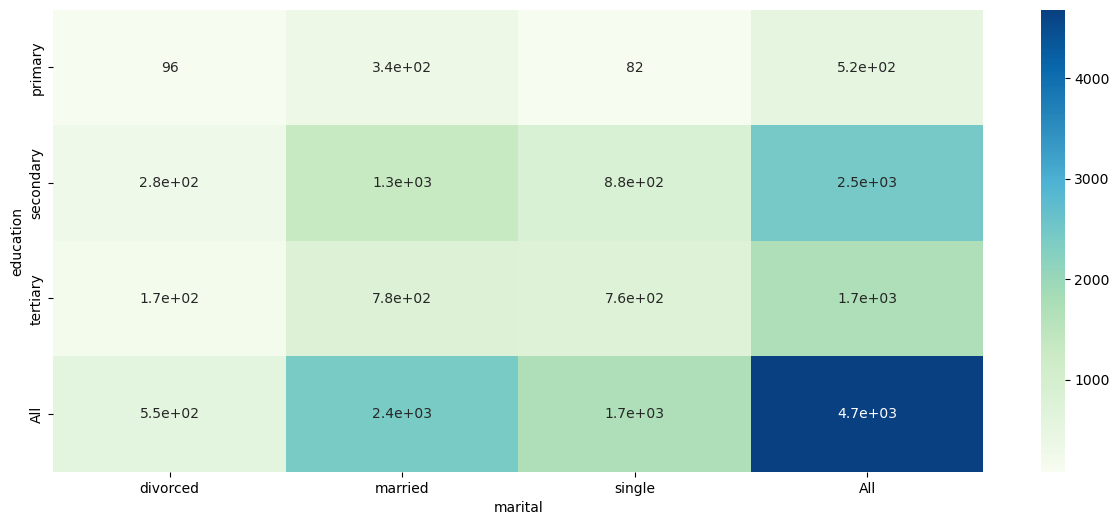

In [540]:
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(15,6))
sns.heatmap(cleen_1, annot=True, cmap='GnBu')

## 4.1. Преобразование признаков

### Проведем преобразование бинарных категориальных признаков с помощью LabelEncoder

In [626]:
# создаем копию dataset
df_encod = df_cleen.copy()

In [627]:
# инициируем модель
lab_encod = LabelEncoder()
# производим кодирование признаков
cols = ['education', 'age_group', 'deposit', 'default', 'housing', 'loan']
df_encod['education'] = lab_encod.fit_transform(df_encod['education'])
df_encod['age_group'] = lab_encod.fit_transform(df_encod['age_group'])
df_encod['deposit'] = lab_encod.fit_transform(df_encod['deposit'])
df_encod['default'] = lab_encod.fit_transform(df_encod['default'])
df_encod['housing'] = lab_encod.fit_transform(df_encod['housing'])
df_encod['loan'] = lab_encod.fit_transform(df_encod['loan'])

### Проведем преобразование категориальных признаков с помощью функции get_dummies()

In [628]:
# создаем дамми-переменные
df_encod = pd.get_dummies(df_encod, columns=['job'])
df_encod = pd.get_dummies(df_encod, columns=['marital'])
df_encod = pd.get_dummies(df_encod, columns=['contact'])
df_encod = pd.get_dummies(df_encod, columns=['month'])
df_encod = pd.get_dummies(df_encod, columns=['poutcome'])

In [629]:
# выводим информацию для визуальной оценки
df_encod.head(3)

,age,education,default,balance,housing,loan,day,duration,campaign,pdays,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,1,0,2343.0,1,0,5,1042,1,-1,...,False,False,True,False,False,False,False,False,False,True
1,56,1,0,45.0,0,0,5,1467,1,-1,...,False,False,True,False,False,False,False,False,False,True
2,41,1,0,1270.0,1,0,5,1389,1,-1,...,False,False,True,False,False,False,False,False,False,True


### Оценим мультиколлинеарность и взаимосвязь признаков с целевой переменной.

In [630]:
# выводим матрицу корреляции
df_encod.corr()

,age,education,default,balance,housing,loan,day,duration,campaign,pdays,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
age,1.000000,-0.191124,-0.009929,0.115164,-0.164196,-0.026357,0.000396,-0.006007,-0.001143,0.006107,...,0.009769,0.024785,-0.119656,0.026875,0.056998,0.036352,0.001994,-0.020942,0.060009,-0.031455
education,-0.191124,1.000000,-0.015692,0.043251,-0.094350,-0.052566,0.008989,-0.016869,-0.012280,0.024123,...,-0.036503,0.052196,-0.104157,0.028704,0.027617,0.030846,0.019845,0.015103,0.070489,-0.069069
default,-0.009929,-0.015692,1.000000,-0.110928,0.009551,0.074786,0.018724,-0.008162,0.033404,-0.037323,...,0.019626,-0.020028,-0.001761,0.000544,-0.023931,-0.016977,-0.025450,-0.017923,-0.041510,0.055032
balance,0.115164,0.043251,-0.110928,1.000000,-0.094919,-0.113089,-0.009987,0.025781,-0.042689,0.045155,...,0.039753,0.043832,-0.098073,0.081861,0.057041,0.047841,0.031040,0.028111,0.073358,-0.085456
housing,-0.164196,-0.094350,0.009551,-0.094919,1.000000,0.072252,-0.022644,0.038492,0.006257,0.064138,...,-0.073133,-0.075948,0.432605,-0.000219,-0.092026,-0.086893,0.085167,0.009830,-0.134477,0.024082
loan,-0.026357,-0.052566,0.074786,-0.113089,0.072252,1.000000,0.019136,0.001476,0.033889,-0.030788,...,-0.014897,-0.041105,0.002778,0.017720,-0.032357,-0.046196,0.007458,-0.019289,-0.082098,0.059235
day,0.000396,0.008989,0.018724,-0.009987,-0.022644,0.019136,1.000000,-0.016695,0.142169,-0.078757,...,-0.182032,-0.044303,-0.014580,0.056471,0.072179,-0.068744,-0.071175,-0.008806,-0.044366,0.085442
duration,-0.006007,-0.016869,-0.008162,0.025781,0.038492,0.001476,-0.016695,1.000000,-0.042576,-0.033053,...,-0.003061,-0.034640,0.007983,-0.015655,-0.012541,-0.012077,-0.039476,-0.009497,-0.025971,0.050571
campaign,-0.001143,-0.012280,0.033404,-0.042689,0.006257,0.033889,0.142169,-0.042576,1.000000,-0.105214,...,0.046763,-0.030574,-0.044348,-0.077307,-0.071519,-0.048672,-0.082282,-0.024854,-0.094260,0.134842
pdays,0.006107,0.024123,-0.037323,0.045155,0.064138,-0.030788,-0.078757,-0.033053,-0.105214,1.000000,...,-0.093551,0.024192,0.028678,-0.007350,0.079833,0.110907,0.608719,0.338049,0.326215,-0.824031


Text(0.5, 1.0, 'Матрица первичной корреляции')

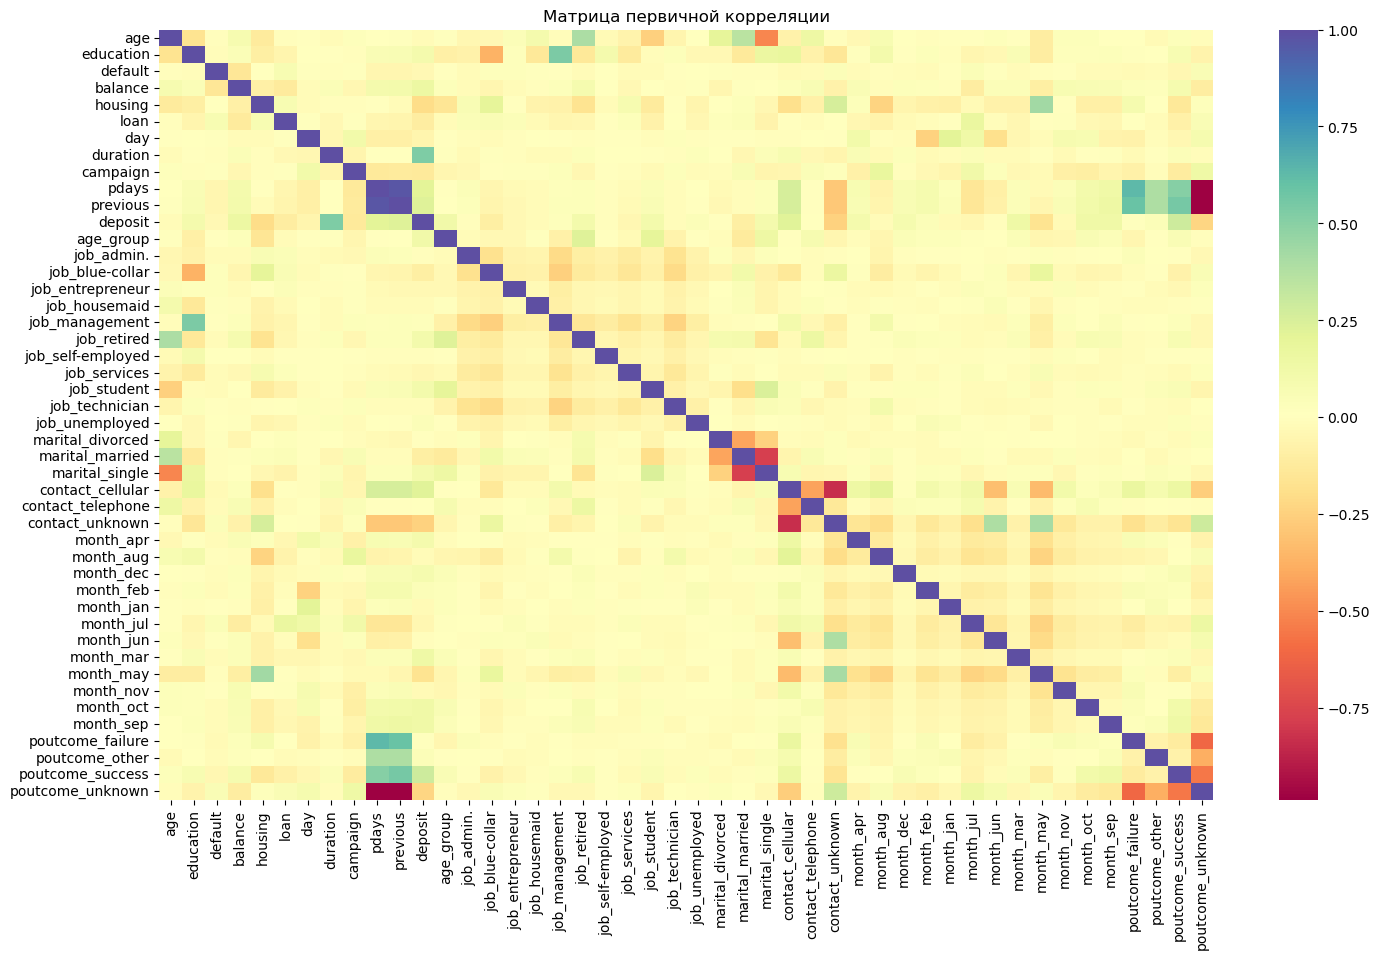

In [631]:
# выводим график - heatmap c оценкой первичной кореляции числовых признаков
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(17,10))
sns.heatmap(data=df_encod.corr(method='spearman'), annot=False, cmap='Spectral')
plt.title('Матрица первичной корреляции')

In [632]:
# описываем функцию вывода признаков с высокой кореляцией
def get_high_correlation(df, threshold=0.7):
    corr = df.corr().abs()
    high_corr = (corr[(corr > threshold) & (corr != 1)]
                      .stack()
                      .reset_index()
                      .rename(columns={0: 'correlation', 'level_0': 'feature_1', 'level_1': 'feature_2'}))
    high_corr = high_corr[high_corr['feature_1'] != high_corr['feature_2']].sort_values(by='correlation', ascending=False)
                      
    return high_corr

In [633]:
# выводим данные о степени кореляции признаков со значением 0.7 и более
high_corr = get_high_correlation(df_encod)
display(high_corr)

,feature_1,feature_2,correlation
3,contact_cellular,contact_unknown,0.837885
4,contact_unknown,contact_cellular,0.837885
0,pdays,poutcome_unknown,0.824031
5,poutcome_unknown,pdays,0.824031
1,marital_married,marital_single,0.779038
2,marital_single,marital_married,0.779038


### Определяем целевую переменную и матрицу наблюдений, а также разделяем выборку на обучающую и тестовую (при разбиении задаем random_state = 42, размер тестовой выборки - 0.33, сохраняем соотношений целевого признака).

In [572]:
# формируем матрицу наблюдений и вектор правильных ответов
X = df_encod.drop(['deposit'], axis=1)
y = df_encod['deposit']
# производим деление выборки на train и test 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = RANDOM_SEED, test_size = 0.33)

In [573]:
# с помощью SelectKBest проводим отбор 15 наиболее важных признаков
select = SelectKBest(f_classif, k=15)
select.fit(X_train, y_train)
features_select = select.get_feature_names_out()
# выводим список наиболее важных признаков
print(features_select)

['balance' 'housing' 'duration' 'campaign' 'pdays' 'previous' 'age_group'
 'contact_cellular' 'contact_unknown' 'month_mar' 'month_may' 'month_oct'
 'month_sep' 'poutcome_success' 'poutcome_unknown']


In [620]:
# формируем матрицы наблюдений train и test с учетом признаков отобранных SelektKBest
X_train = X_train[features_select]
X_test = X_test[features_select]
# нормализуйте данные с помощью minmaxsxaler
mm_scaler = preprocessing.MinMaxScaler()
mm_scaler.fit(X_train)
X_train_scaled = mm_scaler.transform(X_train)
X_test_scaled = mm_scaler.transform(X_test)

### Задание 4.1

In [621]:
# найдите сумму получившихся значений для признака education.
print('Сумма значений признака после преобразования = {}.'.format(df_encod['education'].sum()))

Сумма значений признака после преобразования = 11995.


### Задания 4.2

In [622]:
# dычислите стандартное отклонение по преобразованной в корректный вид целевой переменной deposit. Ответ округлите до трёх знаков после точки-разделителя.
import statistics
stdev_deposit = statistics.stdev(df_encod['deposit'])
print(f'Стандартное отклонение признака deposit составляет: {round(stdev_deposit, 3)}')

Стандартное отклонение признака deposit составляет: 0.499


### Задание 4.3

In [623]:
# вычислите среднее арифметическое для каждой из получившихся переменных, сложите три результата и в качестве ответа впишите итог, округлив его до трёх знаков после точки-разделителя.
avg_default = df_encod['default'].sum() / len(df_encod['default'])
avg_housing = df_encod['housing'].sum() / len(df_encod['housing'])
avg_loan = df_encod['loan'].sum() / len(df_encod['loan'])
print(f'Сумма средних арефмитических по категориям default, housing, loan = {round((avg_default+avg_housing+avg_loan), 3)}')

Сумма средних арефмитических по категориям default, housing, loan = 0.635


### Задание 4.4

Так как функция get_dammies() производит удаление преобразуемых признаков, проведем кодировку с помощью OneHotEncoder библиотеки category_encoders 

In [624]:
# cколько всего признаков в датасете, не считая целевую переменную? Введите ответ, посчитав уже добавленные dummy-переменные, но до удаления номинальных.
encoder = OneHotEncoder(cols=(['job', 'marital', 'contact', 'month', 'poutcome']))
type_bin = encoder.fit_transform(df_cleen[['job', 'marital', 'contact', 'month', 'poutcome']])
df_cat_encoder = pd.concat([df_cleen, type_bin], axis=1)
display(f'После кодирования общее количество признаков без учета целевой переменной составляет: {df_cat_encoder.shape[1] - 1}.')

'После кодирования общее количество признаков без учета целевой переменной составляет: 50.'

### Задания 4.5

In [584]:
# расставьте признаки, в наибольшей степени коррелирующие с целевой переменной, по убыванию силы линейной взаимосвязи.
corr_1 = df_encod['deposit'].corr(df_encod['poutcome_success'])
print(f'Корреляция между deposit и poutcome_success составляет: {corr_1.round(3)}.')
corr_2 = df_encod['deposit'].corr(df_encod['duration'])
print(f'Корреляция между deposit и duration составляет: {corr_2.round(3)}.')
corr_3 = df_encod['deposit'].corr(df_encod['contact_cellular'])
print(f'Корреляция между deposit и contact_cellular составляет: {corr_3.round(3)}.')

Корреляция между deposit и poutcome_success составляет: 0.288.
Корреляция между deposit и duration составляет: 0.458.
Корреляция между deposit и contact_cellular составляет: 0.224.


### Задания 4.6

In [619]:
# есть ли среди признаков мультиколлинеарность? Будем считать достаточно сильной корреляцию не менее 0.9.
# выводим данные о степени кореляции признаков со значением более 0.9 и более
high_corr = get_high_correlation(df_encod, threshold=0.9)
display(high_corr)

,feature_1,feature_2,correlation


### Задания 4.7

In [588]:
# каким получился размер тестовой выборки?
print(f'Размер тестовой выборки {X_test.shape}')

Размер тестовой выборки (3335, 15)


### Задания 4.8

In [593]:
# kаково среднее значение целевой переменной на тестовой выборке? Ответ округлите до двух знаков после точки-разделителя.
deposit_avg_test = df_encod['deposit'].mean()
print(f'Среднее значение целевой переменной на тестовой выборке составляет: {deposit_avg_test.round(2)}.')

Среднее значение целевой переменной на тестовой выборке составляет: 0.46.


### Задание 4.9

In [595]:
# укажите одну переменную, не попавшую в данный перечень:
print(f'Перечень 15 признаков отобранных SelectKBest: {features_select}.')
print()
print('В данный перечень не входит признак - month_jan.')

Перечень 15 признаков отобранных SelectKBest: ['balance' 'housing' 'duration' 'campaign' 'pdays' 'previous' 'age_group'
 'contact_cellular' 'contact_unknown' 'month_mar' 'month_may' 'month_oct'
 'month_sep' 'poutcome_success' 'poutcome_unknown'].

В данный перечень не входит признак - month_jan.


### Задание 4.10

In [596]:
# рассчитайте среднее арифметическое для первого предиктора (т. е. для первого столбца матрицы) из тестовой выборки. Ответ округлите до двух знаков после точки-разделителя.
avg_first_predict = X_test_scaled[:, 0].mean().round(2)
print(f'Среднее арифметическое первого предикта из тестовой выборки после преобразования и отбора наиболее важных 15 признаков составляет: {avg_first_predict}.')

Среднее арифметическое первого предикта из тестовой выборки после преобразования и отбора наиболее важных 15 признаков составляет: 0.47.


# 5. Model bulding (Моделирование)

## 5.1: Решение задачи классификации: логистическая регрессия и решающие деревья

### Задание 1

In [641]:
# обучите логистическую регрессию и рассчитайте метрики качества
# cоздаем объект класса логистическая регрессия
log_reg = LogisticRegression(
    solver='sag', #алгоритм оптимизации
    random_state=RANDOM_SEED, #генератор случайных чисел
    max_iter=1000 #количество итераций на сходимость
)
# обучаем модель
log_reg.fit(X_train_scaled, y_train)

# делаем предсказание для тренировочной выборки
y_train_pred = log_reg.predict(X_train_scaled)
# выводим отчет о метриках классификации
print('train_dataset')
print(metrics.classification_report(y_train, y_train_pred))
# делаем предсказание для тестовой выборки
y_test_pred = log_reg.predict(X_test_scaled)
# выводим отчет о метриках классификации
print('test_dataset')
print(metrics.classification_report(y_test, y_test_pred))

train_dataset
              precision    recall  f1-score   support

           0       0.81      0.88      0.84      3634
           1       0.84      0.76      0.80      3136

    accuracy                           0.82      6770
   macro avg       0.83      0.82      0.82      6770
weighted avg       0.83      0.82      0.82      6770

test_dataset
              precision    recall  f1-score   support

           0       0.79      0.87      0.83      1790
           1       0.83      0.74      0.78      1545

    accuracy                           0.81      3335
   macro avg       0.81      0.80      0.81      3335
weighted avg       0.81      0.81      0.81      3335



### Задания 2,3,4

In [650]:
# обучите решающие деревья, настройте максимальную глубину
# инициируем и обучаем модель "Дерево решений" и выводим метрики:
model_DecTreeClas = DecisionTreeClassifier(
    criterion='entropy',
    random_state=RANDOM_SEED,
    max_depth=6
)
model_DecTreeClas.fit(X_train_scaled, y_train)

# делаем предсказание для тренировочной выборки
y_train_pred = model_DecTreeClas.predict(X_train_scaled)
# выводим отчет о метриках классификации
print('train_dataset')
print(metrics.classification_report(y_train, y_train_pred))
# делаем предсказание для тестовой выборки
y_test_pred = model_DecTreeClas.predict(X_test_scaled)
# вывод отчет о метриках классификации
print('test_dataset')
print(metrics.classification_report(y_test, y_test_pred))

train_dataset
              precision    recall  f1-score   support

           0       0.86      0.79      0.82      3634
           1       0.77      0.86      0.81      3136

    accuracy                           0.82      6770
   macro avg       0.82      0.82      0.82      6770
weighted avg       0.82      0.82      0.82      6770

test_dataset
              precision    recall  f1-score   support

           0       0.85      0.77      0.81      1790
           1       0.76      0.84      0.80      1545

    accuracy                           0.81      3335
   macro avg       0.81      0.81      0.81      3335
weighted avg       0.81      0.81      0.81      3335



In [653]:
# формируем сетку гиперпараметров
param_grid ={#'n_estimators': list(range(100, 500, 50)), # количество деревьев
              'max_depth': [3, 5, 7], # максимальная глубина деревьев
              'min_samples_split': [2, 5, 7, 10] # максимальное количество листьев
               #'max_features': [0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1],
               #'subsample': []}, # доля выборки при обучении каздого алгоритма дерева
              }
# cоздаем объект класса GridSearchCV                 
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(criterion='entropy', random_state=RANDOM_SEED),
    param_grid=param_grid, 
    cv=3,
    scoring=('f1'),
    return_train_score=True, 
    n_jobs = -1
) 
# обучаем модель  
%time grid_search.fit(X_train_scaled, y_train) 
# формируем предсказания целевой переменной
y_train_pred = grid_search.predict(X_train_scaled)
y_test_pred = grid_search.predict(X_test_scaled)
print('f1_score на тренировочном наборе: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))
print('f1_score на тестовом наборе: {:.5f}'.format(metrics.f1_score(y_test, y_test_pred)))
print("Наилучшие значения гиперпараметров: {}".format(grid_search.best_params_))

CPU times: user 71 ms, sys: 13 ms, total: 83.9 ms
Wall time: 1.16 s
f1_score на тренировочном наборе: 0.83
f1_score на тестовом наборе: 0.80355
Наилучшие значения гиперпараметров: {'max_depth': 7, 'min_samples_split': 7}


### Задание 5

In [282]:
# подберите оптимальные параметры с помощью gridsearch

## 5.2: Решение задачи классификации: ансамбли моделей и построение прогноза

### Задание 1

In [660]:
# обучите на ваших данных случайный лес
# инициируем и обучаем модель "Случайный лес" и выводим метрики:
model_RandForClas = RandomForestClassifier(
    criterion='gini',
    n_estimators=100,
    max_depth=10,
    min_samples_leaf=5,
    random_state=RANDOM_SEED
)
model_RandForClas.fit(X_train_scaled, y_train)

# делаем предсказание для тренировочной выборки
y_train_pred = model_RandForClas.predict(X_train_scaled)
# вывод отчет о метриках классификации
print('train_dataset')
print(metrics.classification_report(y_train, y_train_pred))
# делаем предсказание для тестовой выборки
y_test_pred = model_RandForClas.predict(X_test_scaled)
# вывод отчет о метриках классификации
print('test_dataset')
print(metrics.classification_report(y_test, y_test_pred))

train_dataset
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      3634
           1       0.84      0.86      0.85      3136

    accuracy                           0.86      6770
   macro avg       0.86      0.86      0.86      6770
weighted avg       0.86      0.86      0.86      6770

test_dataset
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1790
           1       0.80      0.83      0.82      1545

    accuracy                           0.83      3335
   macro avg       0.83      0.83      0.83      3335
weighted avg       0.83      0.83      0.83      3335



### Задания 2 и 3

In [661]:
# используйте для классификации градиентный бустинг и сравните качество со случайным лесом
# инициируем и обучаем модель "Градиентый бустинг" и выводим метрики:
model_GradBoosClas = GradientBoostingClassifier(
    learning_rate=0.05,
    n_estimators=300,
    min_samples_leaf=5,
    max_depth=5,
    random_state=RANDOM_SEED
)
model_GradBoosClas.fit(X_train_scaled, y_train)

# делаем предсказание для тренировочной выборки
y_train_pred = model_GradBoosClas.predict(X_train_scaled)
# вывод отчет о метриках классификации
print('train_dataset')
print(metrics.classification_report(y_train, y_train_pred))
# делаем предсказание для тестовой выборки
y_test_pred = model_GradBoosClas.predict(X_test_scaled)
# вывод отчет о метриках классификации
print('test_dataset')
print(metrics.classification_report(y_test, y_test_pred))

train_dataset
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      3634
           1       0.87      0.89      0.88      3136

    accuracy                           0.89      6770
   macro avg       0.89      0.89      0.89      6770
weighted avg       0.89      0.89      0.89      6770

test_dataset
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1790
           1       0.80      0.83      0.82      1545

    accuracy                           0.83      3335
   macro avg       0.83      0.83      0.83      3335
weighted avg       0.83      0.83      0.83      3335



### Задание 4

In [664]:
# объедините уже известные вам алгоритмы с помощью стекинга 

estimators = [
    ('model_DecTreeClas', DecisionTreeClassifier(
        criterion='entropy',
        min_samples_leaf=5,
        max_depth=6,
        random_state=42
        )
    ),
    ('log_reg', LogisticRegression(
        solver='sag',
        random_state=42 
        )
    ),
    ('model_GradBoosClas', GradientBoostingClassifier(
        learning_rate=0.05,
        n_estimators=300,
        min_samples_leaf=5,
        max_depth=5,
        random_state=42
        )
    )
]

stack = StackingClassifier(
    estimators,
    final_estimator=LogisticRegression(random_state=RANDOM_SEED)
)
stack.fit(X_train_scaled, y_train)

# делаем предсказание для тренировочной выборки
y_train_pred = stack.predict(X_train_scaled)
# вывод отчет о метриках классификации
print('train_dataset')
print(metrics.classification_report(y_train, y_train_pred))
# делаем предсказание для тестовой выборки
y_test_pred = stack.predict(X_test_scaled)
# вывод отчет о метриках классификации
print('test_dataset')
print(metrics.classification_report(y_test, y_test_pred))

train_dataset
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      3634
           1       0.86      0.86      0.86      3136

    accuracy                           0.87      6770
   macro avg       0.87      0.87      0.87      6770
weighted avg       0.87      0.87      0.87      6770

test_dataset
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1790
           1       0.81      0.81      0.81      1545

    accuracy                           0.82      3335
   macro avg       0.82      0.82      0.82      3335
weighted avg       0.82      0.82      0.82      3335



***NB! Правильный ответ - 0,82*** У меня 0.81

### Задание 5

In [665]:
# оцените, какие признаки демонстрируют наибольшую  важность в модели градиентного бустинга
feature_importan = model_GradBoosClas.feature_importances_
print(feature_importan)

[0.05795212 0.04772538 0.50710587 0.01477693 0.05507909 0.00845623
 0.03990225 0.00358823 0.07261403 0.02781861 0.01521407 0.01988016
 0.01352999 0.11495825 0.00139878]


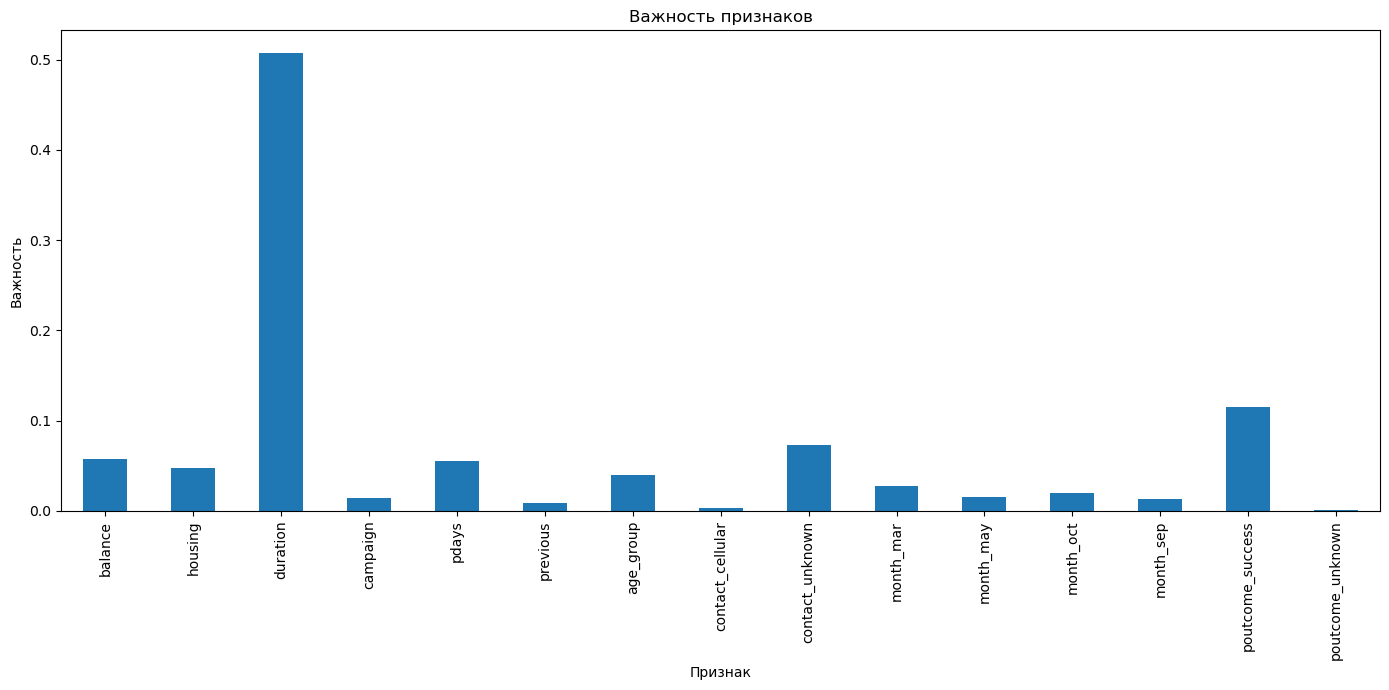

In [694]:
imporance = pd.Series(model_GradBoosClas.feature_importances_,
                      df_encod[features_select].columns)
fig, ax = plt.subplots(figsize=(14,7))
imporance.plot.bar(ax=ax)
ax.set_title("Важность признаков")
ax.set_xlabel('Признак')
ax.set_ylabel('Важность')
fig.tight_layout()

### Задания 6,7,8

In [709]:
# реализуйте оптимизацию гиперпараметров с помощью Optuna

# описываем функцию для расчета объекта класса Optuna
def optuna_rf(trial):
  # задаем пространства поиска гиперпараметров
  criterion = trial.suggest_categorical('criterion', ['gini', 'entropy', 'log_loss'])
  n_estimators = trial.suggest_int('n_estimators', 100, 1000, 1)
  max_depth = trial.suggest_int('max_depth', 10, 50, 1)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 20, 1)

  # создаем модель
  model = RandomForestClassifier(
                                criterion=criterion,
                                n_estimators=n_estimators,
                                max_depth=max_depth,
                                min_samples_leaf=min_samples_leaf,
                                random_state=RANDOM_SEED)
  # обучаем модель
  model.fit(X_train_scaled, y_train)
  score = metrics.f1_score(y_train, model.predict(X_train_scaled))

  return score

In [710]:
%%time
# cоздаем объект исследования (максимизируя метрику direction="maximize")
study = optuna.create_study(study_name="RandomForestClassifier", direction="maximize")
# производим поиск лучшей комбинации гиперпараметров (n_trials - количество итераций)
study.optimize(optuna_rf, n_trials=30)

[I 2023-10-01 14:29:00,012] A new study created in memory with name: RandomForestClassifier
[I 2023-10-01 14:29:04,367] Trial 0 finished with value: 0.8935373087730253 and parameters: {'criterion': 'gini', 'n_estimators': 758, 'max_depth': 50, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.8935373087730253.
[I 2023-10-01 14:29:06,850] Trial 1 finished with value: 0.8464185173600249 and parameters: {'criterion': 'log_loss', 'n_estimators': 547, 'max_depth': 47, 'min_samples_leaf': 11}. Best is trial 0 with value: 0.8935373087730253.
[I 2023-10-01 14:29:08,532] Trial 2 finished with value: 0.9247446975648075 and parameters: {'criterion': 'entropy', 'n_estimators': 255, 'max_depth': 27, 'min_samples_leaf': 2}. Best is trial 2 with value: 0.9247446975648075.
[I 2023-10-01 14:29:12,049] Trial 3 finished with value: 0.8610201216658867 and parameters: {'criterion': 'gini', 'n_estimators': 678, 'max_depth': 37, 'min_samples_leaf': 6}. Best is trial 2 with value: 0.9247446975648075.
[I 2

CPU times: user 58.6 s, sys: 763 ms, total: 59.4 s
Wall time: 59.7 s


In [711]:
# выводим лучшие гиперпараметры на тренировочной выборке
print("Наилучшие значения гиперпараметров {}".format(study.best_params))
print("f1_score на обучающем наборе: {:.2f}".format(study.best_value))

Наилучшие значения гиперпараметров {'criterion': 'entropy', 'n_estimators': 255, 'max_depth': 27, 'min_samples_leaf': 2}
f1_score на обучающем наборе: 0.92


In [712]:
# рассчитаем точность для тестовой выборки
model_optuna = RandomForestClassifier(**study.best_params,random_state=RANDOM_SEED, )
model_optuna.fit(X_train_scaled, y_train)

# делаем предсказание для тренировочной выборки
y_train_pred = model_optuna.predict(X_train_scaled)
# вывод отчет о метриках классификации
print('train_dataset')
print(metrics.classification_report(y_train, y_train_pred))
# делаем предсказание для тестовой выборки
y_test_pred = model_optuna.predict(X_test_scaled)
# вывод отчет о метриках классификации
print('test_dataset')
print(metrics.classification_report(y_test, y_test_pred))

train_dataset
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      3634
           1       0.91      0.94      0.92      3136

    accuracy                           0.93      6770
   macro avg       0.93      0.93      0.93      6770
weighted avg       0.93      0.93      0.93      6770

test_dataset
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1790
           1       0.80      0.84      0.82      1545

    accuracy                           0.83      3335
   macro avg       0.83      0.83      0.83      3335
weighted avg       0.83      0.83      0.83      3335



In [691]:
# формируем и выводим график истории оптимизации
optuna.visualization.plot_optimization_history(study, target_name="f1_score")

In [692]:
# формируем и выводим график важности гиперпараметров
optuna.visualization.plot_param_importances(study, target_name="f1_score")

In [693]:
# формируем и выводим график связи комбинаций гиперпараметров и целевой метрики
optuna.visualization.plot_contour(study, params=["max_depth", "n_estimators"],
                                  target_name="f1_score")